<a href="https://colab.research.google.com/github/LexyFadillahN/PCVK_Genap_2021/blob/main/TugasBesar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Color Detection**

In [1]:
from google.colab import drive

drive.mount('/content/drive/')

Mounted at /content/drive/


# **Import libraries**

In [2]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (183, 275, 3)


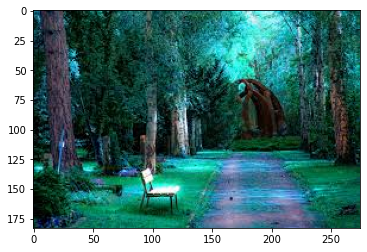

In [3]:
image = cv2.imread('/content/drive/MyDrive/PCVK_MM/sample_image.jpg')
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

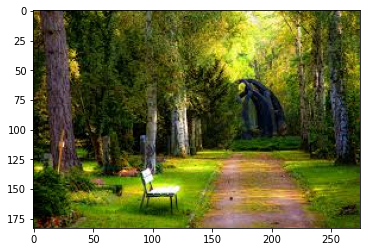

In [4]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

**converted to grayscale**

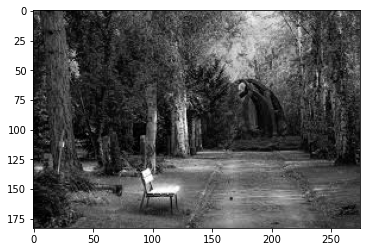

In [5]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')

resize image

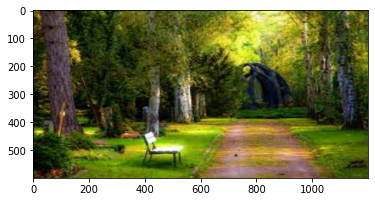

In [6]:
resized_image = cv2.resize(image, (1200, 600))
plt.imshow(resized_image)

Mendeteksi sebuah fungsi yang dapat memberikan nilai hex dari warna yang akan kita identifikasi.

In [7]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [8]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [9]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i]/255 for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]*255) for i in counts.keys()]
    rgb_colors = [ordered_colors[i]*255 for i in counts.keys()]
    
    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = ordered_colors)
    
    return rgb_colors

[array([159.69242992, 128.54403586,  96.47639314]),
 array([129.25072739, 136.75562935,  27.64512966]),
 array([87.33858013, 80.20582533, 66.20037851]),
 array([50.31274077, 57.90573273, 18.9834122 ]),
 array([18.12200996, 25.20720848,  6.64833853]),
 array([84.85762006, 97.82580877, 16.99139194]),
 array([229.773905  , 225.21884639, 140.56107341]),
 array([195.40235227, 192.54526678,  53.643144  ])]

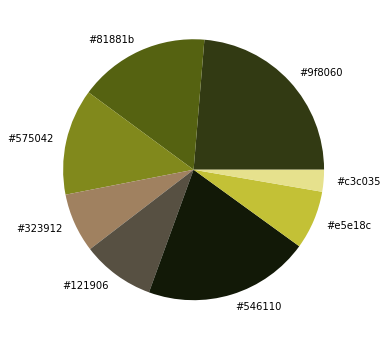

In [15]:
get_colors(get_image('/content/drive/MyDrive/PCVK_MM/sample_image.jpg'), 8, True)